In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [0]:
cancer = load_breast_cancer()
X=cancer.data
y=cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [32]:
log_reg=LogisticRegression(C=100)
log_reg.fit(X_train,y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [0]:
y_pred=log_reg.predict(X_test)
from sklearn import metrics

In [34]:
print(metrics.accuracy_score(y_test, y_pred))

0.9649122807017544


Regularization:

prevention of overfitting - (according to Muller and Guido ML book)

L1 - assumes only a few features are important

L2 - does not assume only a few features are important - used by default in scikit-learn LogisticRegression

'C':

parameter to control the strength of regularization


lower C => log_reg adjusts to the majority of data points.

higher C => correct classification of each data point.


In [30]:
log_reg100= LogisticRegression(C=100)
log_reg100.fit(X_train, y_train)
print('Accuracy on the training subset: {:.3f}'.format(log_reg100.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(log_reg100.score(X_test, y_test)))

Accuracy on the training subset: 0.974
Accuracy on the test subset: 0.965


In [31]:
log_reg001 = LogisticRegression(C=0.01)
log_reg001.fit(X_train, y_train)
print('Accuracy on the training subset: {:.3f}'.format(log_reg001.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(log_reg001.score(X_test, y_test)))

Accuracy on the training subset: 0.930
Accuracy on the test subset: 0.939


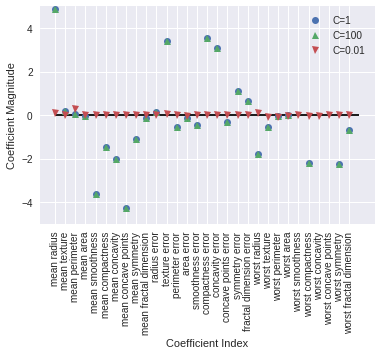

In [36]:
plt.plot(log_reg.coef_.T, 'o', label='C=1')
plt.plot(log_reg100.coef_.T, '^', label='C=100')
plt.plot(log_reg001.coef_.T, 'v', label='C=0.01')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0,0, cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.legend()